In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Basic dataset overview
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Distribution of Attrition values
print("\nAttrition value counts:")
print(df['Attrition'].value_counts())


Dataset shape: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

First 5 rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently

Dataset shape: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Summary statistics (numeric):
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165          

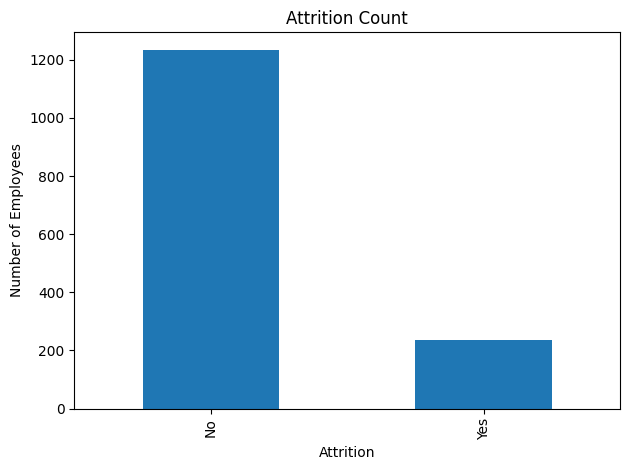

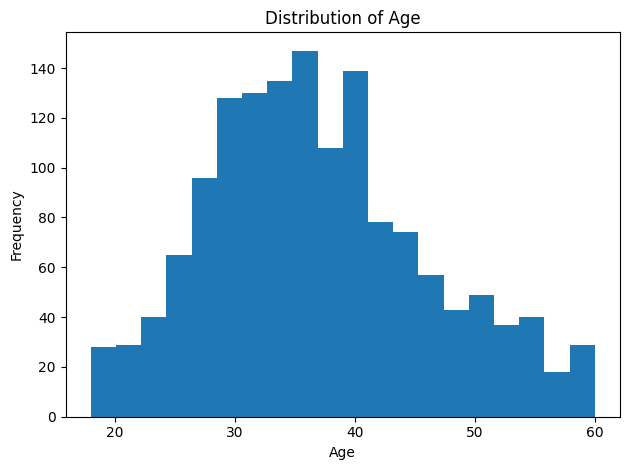

C:\Users\abdin\AppData\Local\Temp\ipykernel_52508\1875434023.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([income_no, income_yes], labels=['No', 'Yes'])


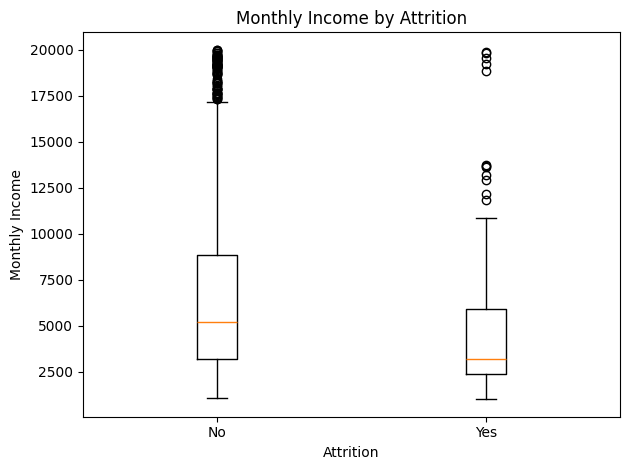

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Print basic information
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSummary statistics (numeric):")
print(df.describe())

# Summary statistics for categorical columns
print("\nSummary statistics (categorical):")
print(df.describe(include=['object']))

# Visual 1: Bar chart of Attrition counts
attrition_counts = df['Attrition'].value_counts()
plt.figure()
attrition_counts.plot(kind='bar')
plt.title("Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

# Visual 2: Histogram of Age distribution
plt.figure()
plt.hist(df['Age'], bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Visual 3: Box plot of Monthly Income by Attrition
plt.figure()
# Create separate data for employees who left vs. stayed
income_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
income_no = df[df['Attrition'] == 'No']['MonthlyIncome']

plt.boxplot([income_no, income_yes], labels=['No', 'Yes'])
plt.title("Monthly Income by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np


data = df.copy()

# Encode the target variable 'Attrition': Yes -> 1, No -> 0
le = LabelEncoder()
data['Attrition_enc'] = le.fit_transform(data['Attrition'])

# Select a subset of features for modeling.

selected_features = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany',
    'NumCompaniesWorked', 'OverTime'
]

# For categorical features like OverTime, encode them.
for col in ['OverTime']:
    data[col] = le.fit_transform(data[col])

X = data[selected_features]
y = data['Attrition_enc']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display feature coefficients to understand feature importance
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_[0]
})
print("\nFeature Coefficients:")
print(coefficients.sort_values(by='Coefficient', key=np.abs, ascending=False))


Model Accuracy: 0.8458049886621315

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       380
           1       0.23      0.05      0.08        61

    accuracy                           0.85       441
   macro avg       0.55      0.51      0.50       441
weighted avg       0.78      0.85      0.80       441


Feature Coefficients:
              Feature  Coefficient
6            OverTime     1.535761
3     JobSatisfaction    -0.284819
5  NumCompaniesWorked     0.152865
0                 Age    -0.049136
4      YearsAtCompany    -0.036434
1    DistanceFromHome     0.025743
2       MonthlyIncome    -0.000090


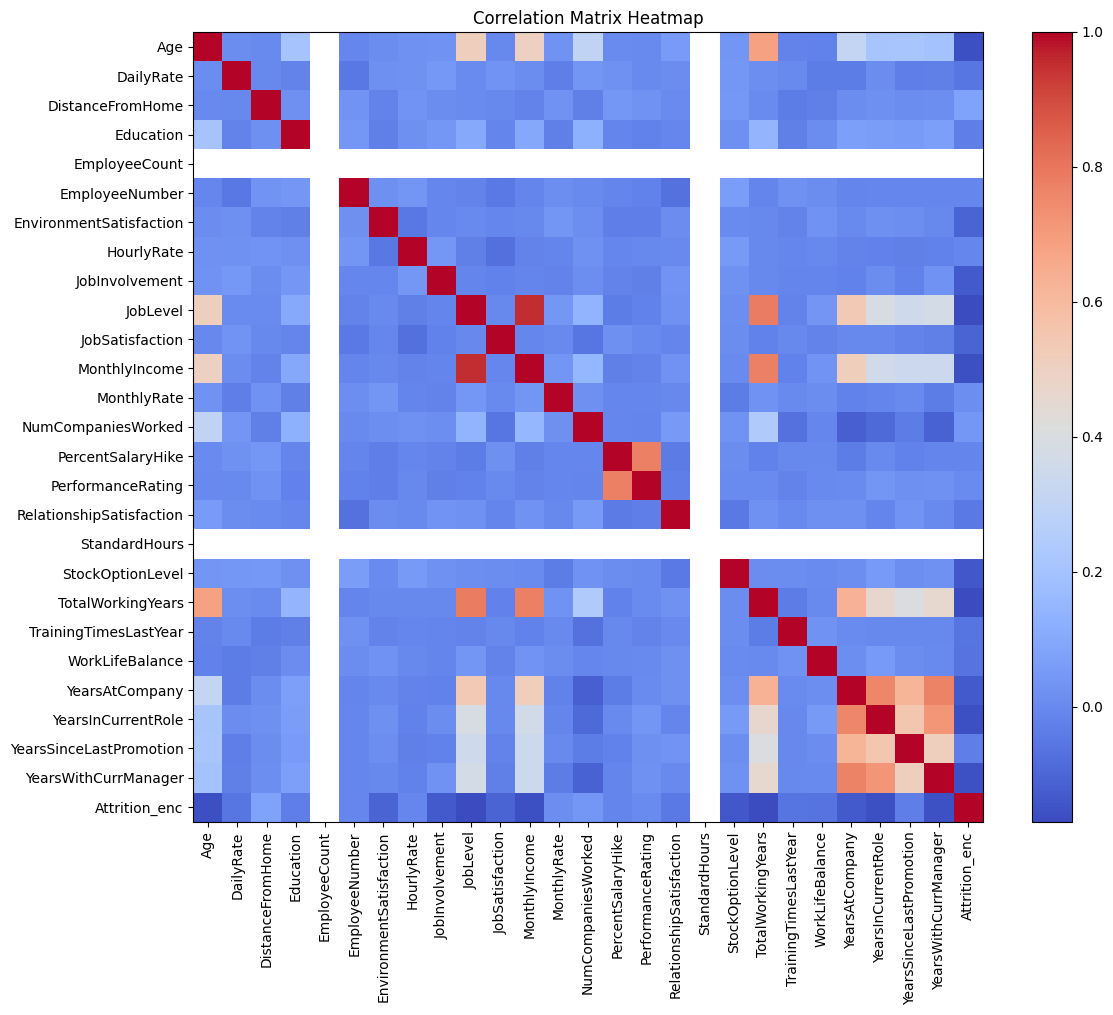

Correlation of features with Attrition (encoded):
Attrition_enc               1.000000
TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
DistanceFromHome            0.077924
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
MonthlyRate                 0.015170
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
EmployeeCount            

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# If needed, encode categorical features to numerical values.
# For this example, we'll focus on features that are already numerical or pre-encoded.
# Let's also encode the Attrition column for correlation analysis:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition_enc'] = le.fit_transform(df['Attrition'])

# Calculate the correlation matrix for numeric columns (including the encoded attrition)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot correlation matrix heatmap using matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

# Additionally, display the correlation of each feature with Attrition_enc
attrition_corr = corr_matrix['Attrition_enc'].sort_values(key=lambda x: abs(x), ascending=False)
print("Correlation of features with Attrition (encoded):")
print(attrition_corr)
